<a href="https://colab.research.google.com/github/turkin501/CS116.M11.KHTN/blob/main/Ex_5/CS116_Ex5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
from IPython.display import clear_output
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

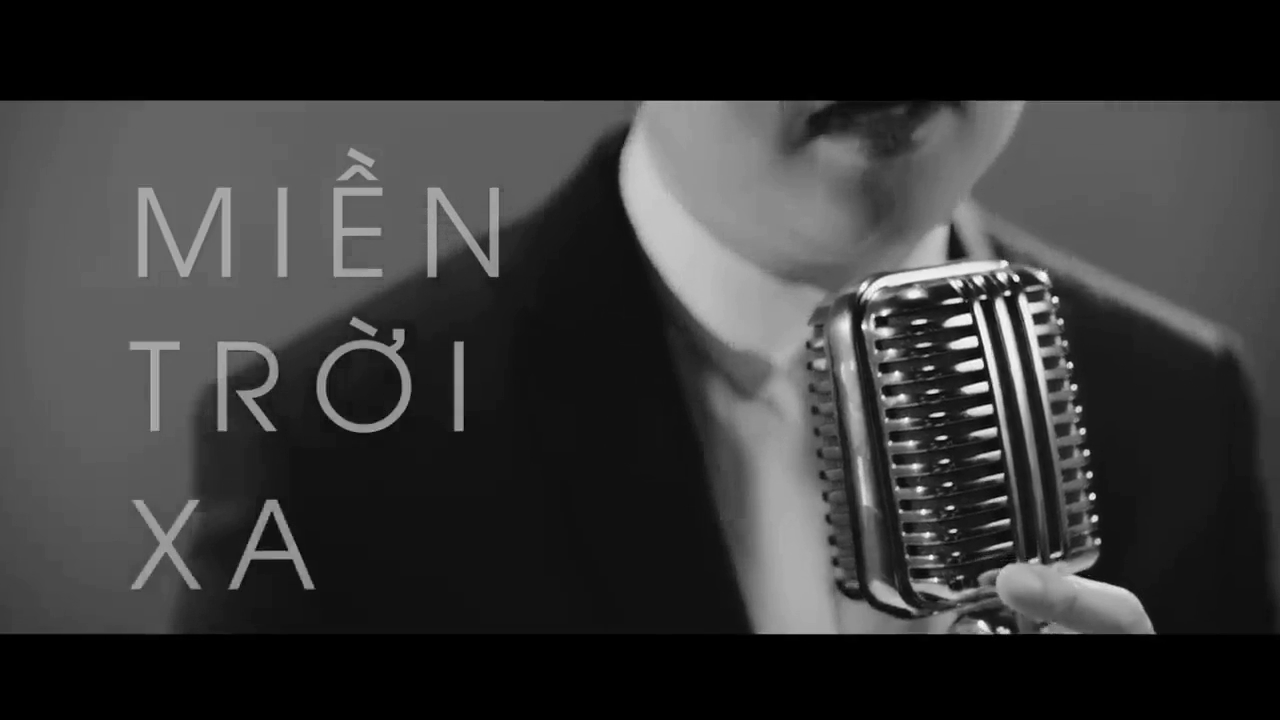

In [ ]:
# video su dung co thoi luong 3 giay va chat luong 720p
cap = cv.VideoCapture("/content/lon.mp4")

while cap.isOpened():
    ret, img = cap.read()
    if ret == False:
        break
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    cv2_imshow(gray)
    clear_output(wait=True)
      
cv.destroyAllWindows()
cap.release()
    

# Giải pháp 1

In [ ]:
gray.shape

(720, 1280)

In [ ]:
pca = PCA(n_components = 32)

def pca0(img):
    img_trans = pca.fit_transform(img)
    img_intrans = pca.inverse_transform(img_trans)
    return img_intrans

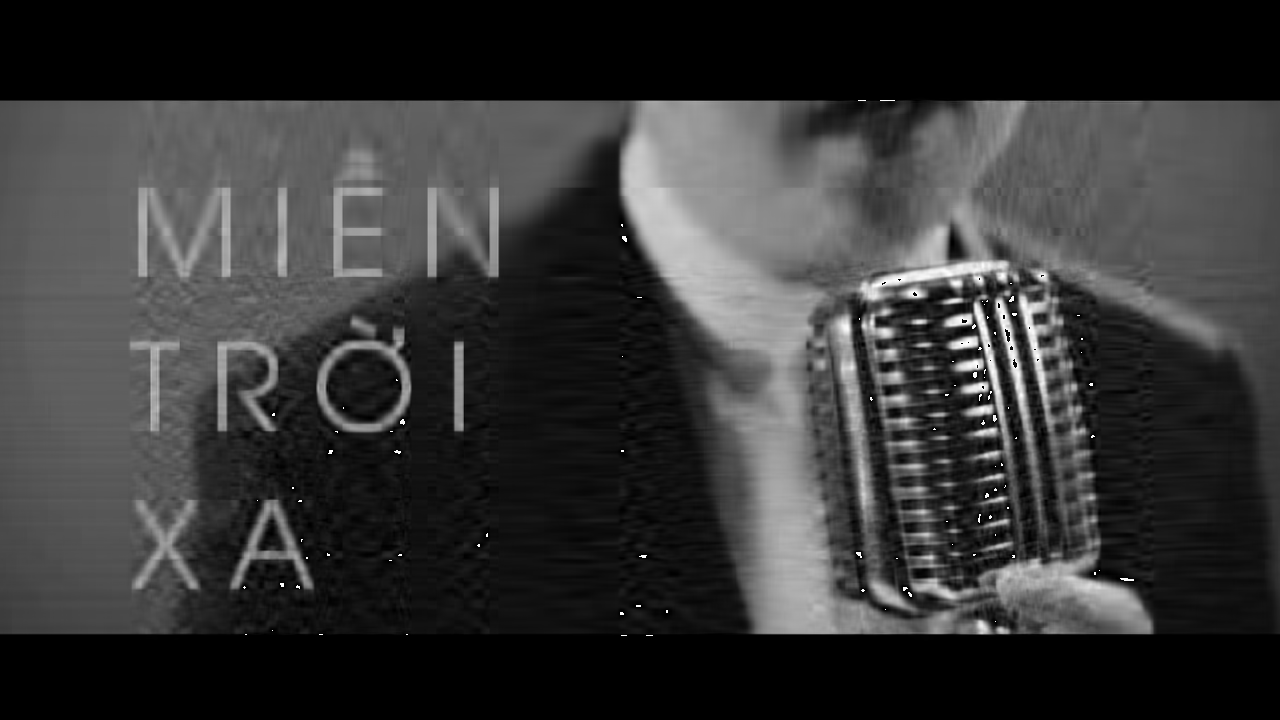

In [ ]:
fourcc = cv.VideoWriter_fourcc(*'MJPG')
out = cv.VideoWriter('/content/output1.avi',fourcc, 24, (720,1280))

cap = cv.VideoCapture("/content/lon.mp4")



while cap.isOpened():
    ret, img = cap.read()
    if ret == False:
        break
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    sol = pca0(gray)
    frame = np.uint8(sol)
    out.write(frame)
    cv2_imshow(frame)
    clear_output(wait=True)
      
cap.release()
cv.destroyAllWindows()
out.release()

# Giải pháp 2

In [ ]:
def pca1(img):
    img_trans = pca.fit_transform(img)
    print(img_trans.shape)
    img_intrans = pca.inverse_transform(img_trans)
    return img_intrans

In [ ]:
gray.shape

(720, 1280)

In [ ]:
height, width = gray.shape
len = height * width

In [ ]:
cap = cv.VideoCapture("/content/lon.mp4")

mat = np.empty([1,len])
while cap.isOpened():
    ret, img = cap.read()
    if ret == False:
        break
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray0 = np.uint8(gray)
    mat = np.append(mat, gray0.reshape(1,len), axis = 0)
      
cv.destroyAllWindows()
cap.release()

In [ ]:
mat.shape

(74, 921600)

In [ ]:
mat_pca = pca1(mat)

(74, 32)


In [ ]:
mat_pca.shape

(74, 921600)

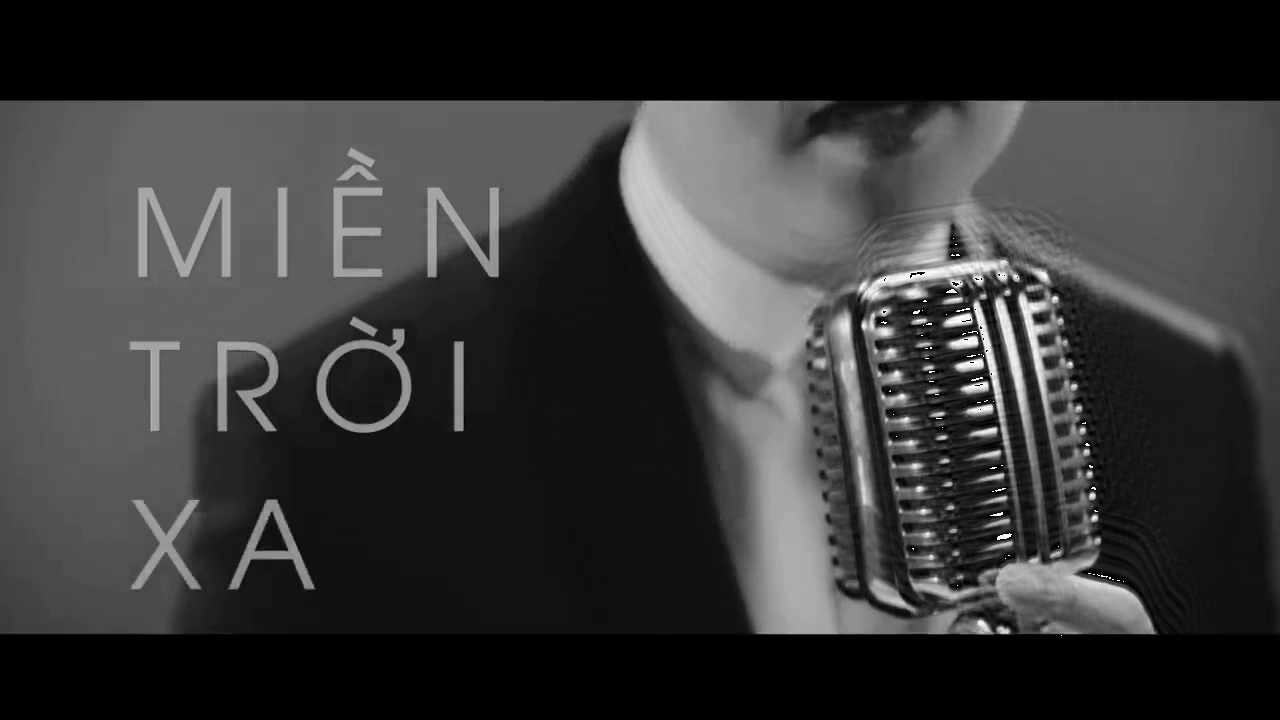

In [ ]:
fourcc = cv.VideoWriter_fourcc(*'MJPG')
out = cv.VideoWriter('/content/output2.avi',fourcc, 24, (720,1280))

for f in mat_pca[1:]:
    frame = np.uint8(f.reshape(height, width))
    out.write(frame)
    cv2_imshow(frame)
    clear_output(wait=True)
out.release()